# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Number of anomalies detected: 9


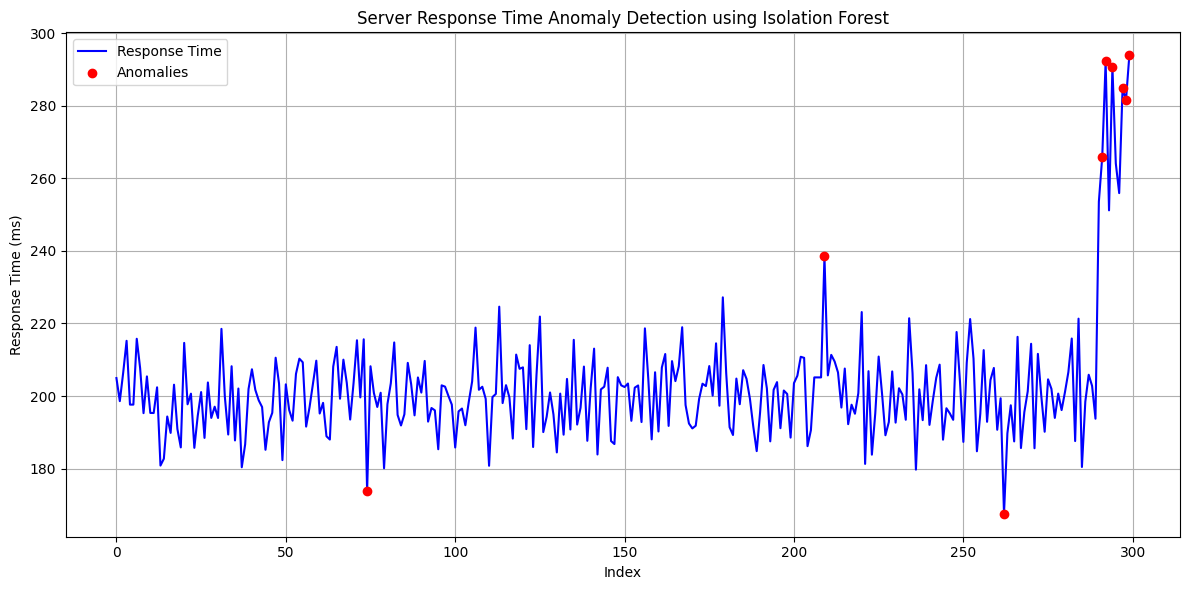

In [1]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate dataset (Server Response Times in milliseconds)
np.random.seed(42)
normal_response = np.random.normal(loc=200, scale=10, size=290)
anomalies = np.random.uniform(low=250, high=300, size=10)  # Injected anomalies
response_times = np.concatenate([normal_response, anomalies])

df = pd.DataFrame({'ResponseTime': response_times})

# Step 2: Train Isolation Forest model
model = IsolationForest(contamination=0.03, random_state=42)  # ~3% expected anomalies
df['Anomaly'] = model.fit_predict(df[['ResponseTime']])

# Step 3: Detect anomalies
# Isolation Forest returns -1 for anomalies, 1 for normal
df['AnomalyFlag'] = df['Anomaly'] == -1

# Step 4: Evaluate and visualize results
anomaly_count = df['AnomalyFlag'].sum()
print(f"Number of anomalies detected: {anomaly_count}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['ResponseTime'], label='Response Time', color='blue')
plt.scatter(df[df['AnomalyFlag']].index, df[df['AnomalyFlag']]['ResponseTime'],
            color='red', label='Anomalies', zorder=5)
plt.xlabel('Index')
plt.ylabel('Response Time (ms)')
plt.title('Server Response Time Anomaly Detection using Isolation Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

